# Predicting Diamond's Price with Random Forest in Python with Scikit-learn


In this small project, I'll try to predict price of diamonds with the help of <b>Random Forest Regressor.

## Step 1: Importing Liberaries, Loading and Preparing Data

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

In [40]:
%matplotlib inline

In [41]:
diamonds = pd.read_csv('data/p1_diamonds.csv')

In [42]:
df = diamonds

In [43]:
df.head(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


Okay, in our data, we have some issues. In the next step, we will clean and prepare our data before we can make any prediction.
For example, prices of diamonds depends on cut, color and clarity features. As we can see, these values are not numerical.
Moreover, there is unnamed: 0 column at the start, which is not useful for me. So I'll get rid of it.

Luckily, we can use Scikit-learn's preprocessing liberary to encode above data to numerical data.

In [44]:
# Import label encoder
from sklearn.preprocessing import LabelEncoder

In [45]:
# dropping Unnamed column, axis = 1 means we are dropping column
df = df.drop(['Unnamed: 0'], axis = 1)

In [46]:
# Creating categorical variables

categorical_features = ['cut', 'color', 'clarity']
le = LabelEncoder()

# Converting the variables to some sort of numerical
for i in range(3):
    new = le.fit_transform(df[categorical_features[i]])
    df[categorical_features[i]] = new

In [47]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


## Step 2: Traing the Model

First of all, we have to define our target and features. The good thing about random forest algorithm is that it does not require data scaling.

In [32]:
X = df[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']]
y = df[['price']]

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Splitting data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25, random_state = 101)

# Train the Model

regr = RandomForestRegressor(n_estimators = 10, max_depth = 10, random_state = 101)
regr.fit(X_train, y_train.values.ravel())

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=101, verbose=0,
                      warm_start=False)

<b>This is our pre-trained model now and we can make price prediction.</b>

In [49]:
import warnings
warnings.filterwarnings('ignore')

# Make prediction
predictions = regr.predict(X_test)

result = X_test
result['price'] = y_test
result['prediction'] = predictions.tolist()

result.head()

,carat,cut,color,clarity,depth,table,x,y,z,price,prediction
46519,0.51,2,3,4,62.7,54.0,5.10,5.08,3.19,1781,1700.365148
8639,1.06,3,5,2,61.9,59.0,6.52,6.50,4.03,4452,4454.261777
23029,0.33,2,3,2,61.3,56.0,4.51,4.46,2.75,631,627.135161
51641,0.31,1,3,5,63.1,58.0,4.30,4.35,2.73,544,689.175700
25789,2.04,3,5,2,58.8,60.0,8.42,8.32,4.92,14775,15430.225174


<b>Let's visualize above table to get clear picture with matplotlib</b>

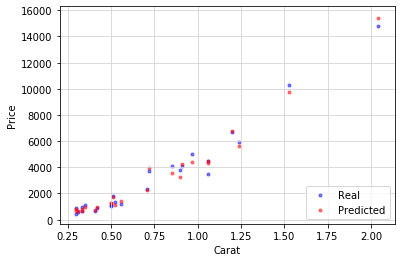

In [55]:
# Define x axis
x_axis = X_test.carat

# Build scatterplot
plt.scatter(x_axis, y_test, c = 'b', alpha = 0.5, marker = '.', label = 'Real')
plt.scatter(x_axis, predictions, c = 'r', alpha = 0.5, marker = '.', label = 'Predicted')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.grid(color = '#D3D3D3', linestyle = 'solid')
plt.legend(loc = 'lower right')
plt.show()

Below 1.25 carat, out model is doing very well. As you can see real price (blue dots) and predicted price (read dots) are even overlapping each other. In next step, we will evaluate our model.

## Step 3: Model Evaluation

In [57]:
# importing necessary liberaries

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Mean squared error (MSE)
mse = mean_squared_error(y_test.values.ravel(), predictions)

# R2 Score
r2 = r2_score(y_test.values.ravel(), predictions)

# Mean Absolute Error
mae = mean_absolute_error(y_test.values.ravel(), predictions)

#Print Results

print("Mean squared error (MSE): ", round(mse, 2))
print("R2 Score: ", round(r2, 2))
print("Mean Absolute Error (MAE): ", round(mae, 2))


Mean squared error (MSE):  117444.1
R2 Score:  0.99
Mean Absolute Error (MAE):  249.98


We have very good R score but to my surprise errors are very high. Unfortunately, it is not a very good model. In order to fix this problem, we can use an other Scikit-learn's method named GridSearchCV to fine tune our model.

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {
    
    'max_depth': [70, 80, 90, 100],
    'n_estimators': [900, 1000, 1100]
}

gridforest = GridSearchCV(regr, parameters, cv = 3, n_jobs = -1, verbose = 1)
gridforest.fit(X_train, y_train)
gridforest.best_params_

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
